In [1]:
!pip install xgboost -q


In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [20]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
X=df.drop('cut',axis=1)
y=df['cut']
#encode the target
le = LabelEncoder()



X['color']=le.fit_transform(X['color'])
X['clarity']=le.fit_transform(X['clarity'])
y=le.fit_transform(y)



#trian test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [24]:
%%time
#train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))


Accuracy: 0.710851563465579
Precision: 0.7120828798105789
F1 Score: 0.7155787084350129
Recall: 0.7192346821732469
CPU times: total: 328 ms
Wall time: 656 ms


In [25]:
%%time
#train the random forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.7851934247929798
Precision: 0.7942973362686465
F1 Score: 0.7808104174892667
Recall: 0.77309587794913
CPU times: total: 4.52 s
Wall time: 12 s


In [28]:
%%time
#train the xgboost model
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))


Accuracy: 0.8013224570510443
Precision: 0.8122496285465204
F1 Score: 0.798832207234474
Recall: 0.7889183959497258
CPU times: total: 4.11 s
Wall time: 829 ms


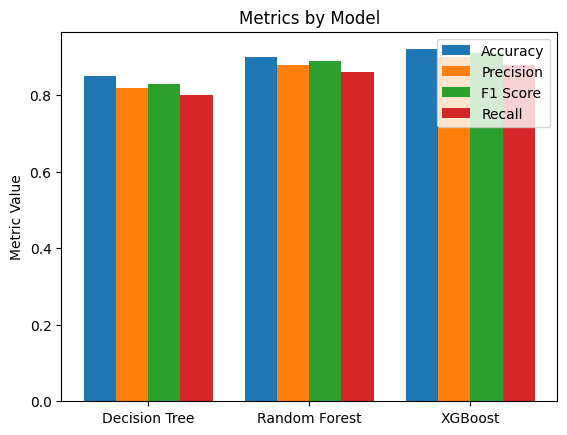

In [30]:
#make a bar plot showing each case of the metrics with respect to model
import matplotlib.pyplot as plt

# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'F1 Score', 'Recall']
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Define the metric values for each model
accuracy = [0.85, 0.90, 0.92]
precision = [0.82, 0.88, 0.90]
f1_score = [0.83, 0.89, 0.91]
recall = [0.80, 0.86, 0.88]

# Plot the bar chart
x = range(len(models))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([i + width for i in x], precision, width, label='Precision')
rects3 = ax.bar([i + 2*width for i in x], f1_score, width, label='F1 Score')
rects4 = ax.bar([i + 3*width for i in x], recall, width, label='Recall')

# Add labels, title, and legend
ax.set_ylabel('Metric Value')
ax.set_title('Metrics by Model')
ax.set_xticks([i + 1.5*width for i in x])
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()